# Detecção de Fraude de Cartão de Crédito - Regressão Logística

## 1. Introdução


O projeto tem como objetivo identificar transações fraudulentas no serviço de cartão de crédito de seus clientes utilizando algoritmo de regressão logística. Para isso, foi selecionado um conjunto de dados que contém transações efetuadas com cartões de crédito durante dois dias do mes de setembro de 2013 por titulares de cartões europeus. No total, foram 284.807 transações analisadas.

A base de dados contém apenas variáveis ​​de entrada numéricas que são o resultado de uma transformação PCA, sendo as variáveis V1, V2,… V28. As únicas variáveis que não foram transformadas são 'Time' e 'Amount'.

**Time**: segundos decorridos entre cada transação e a primeira transação no conjunto de dados.\
**Amount**: valor total da transação.\
**Class (variável resposta)**: assume valor 1 em caso de fraude e 0 caso contrário.

Além disso, por conta das questões de confidencialidade, não foi possível trazer os valores originais e nomes originais das variáveis.

Link para Base de Dados no Kaggle: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

## 2. Importando Bibliotecas

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Nomalizacao
from sklearn.preprocessing import RobustScaler

# Balanceamento
from imblearn.over_sampling import SMOTE


## 3. Importação os Dados

In [44]:
creditcard = pd.read_csv("/Users/marianacaetano/Library/CloudStorage/OneDrive-Pessoal/Profissional/Projetos ML/Classificação/creditcard.csv", sep=',')
creditcard.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [45]:
creditcard.shape[0] # Número de Registros

284807

In [46]:
creditcard.columns # Variáveis

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [47]:
creditcard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## 4. Limpeza dos Dados

In [48]:
# Verificando registros nulos
def null_values(creditcard):
    null_count = creditcard.isnull().sum()
    
    if null_count.any():
        nulos = creditcard[creditcard.isnull()]
        return nulos
    else:
        return "Não há nulos"

null_values(creditcard)

'Não há nulos'

In [49]:
# Verificando
creditcard.query('Amount == 0')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
383,282.0,-0.356466,0.725418,1.971749,0.831343,0.369681,-0.107776,0.751610,-0.120166,-0.420675,...,0.020804,0.424312,-0.015989,0.466754,-0.809962,0.657334,-0.043150,-0.046401,0.0,0
514,380.0,-1.299837,0.881817,1.452842,-1.293698,-0.025105,-1.170103,0.861610,-0.193934,0.592001,...,-0.272563,-0.360853,0.223911,0.598930,-0.397705,0.637141,0.234872,0.021379,0.0,0
534,403.0,1.237413,0.512365,0.687746,1.693872,-0.236323,-0.650232,0.118066,-0.230545,-0.808523,...,-0.077543,-0.178220,0.038722,0.471218,0.289249,0.871803,-0.066884,0.012986,0.0,0
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.0,1
575,430.0,-1.860258,-0.629859,0.966570,0.844632,0.759983,-1.481173,-0.509681,0.540722,-0.733623,...,0.268028,0.125515,-0.225029,0.586664,-0.031598,0.570168,-0.043007,-0.223739,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283719,171817.0,-0.750414,0.904175,0.996461,0.427284,1.720336,0.929256,0.794272,0.176719,-1.836261,...,0.050750,0.115532,-0.623995,-0.186896,0.733759,2.558151,-0.188835,0.001654,0.0,0
283782,171870.0,2.083677,-0.065811,-1.442870,0.135416,0.043035,-1.306975,0.335835,-0.371635,0.730560,...,-0.147536,-0.246599,0.194758,-0.082277,0.012887,-0.069278,-0.048995,-0.065482,0.0,0
283949,172027.0,2.132569,-0.057836,-1.724522,-0.030326,0.412146,-0.903088,0.345843,-0.348132,0.722638,...,-0.188739,-0.343876,0.105024,-0.763831,0.117381,-0.027682,-0.047514,-0.071700,0.0,0
284085,172140.0,-2.210521,-1.039425,0.189704,-1.291932,3.742120,-1.665061,3.120388,-2.324089,0.364926,...,-0.286359,1.326003,-0.361764,-0.268117,1.051309,0.334629,-1.930149,-0.899888,0.0,0


É possível observar a existência de valores transacionados iguais a zero. Isso acontece em transações de teste em que instituições e plataformas costumam fazer para validar o cartão de crédito do usuário antes de realizar, de fato, a transação com o valor real. Por isso, não existe a necessidade de tratar essas observações, já que não consideramos como um problema.

## 6. Análise Exploratória dos Dados (AED)

#### 6.1 Identificando o Desbalanceamento

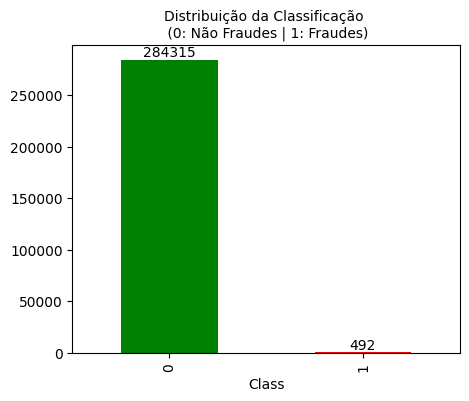

In [50]:
cores = ['green', 'red']

ordem = [0, 1]  # Defina a ordem desejada
contagem_fraude = creditcard['Class'].value_counts().reindex(ordem)

plt.figure(figsize=(5, 4))
barras = contagem_fraude.plot.bar(color=cores)
plt.title('Distribuição da Classificação \n (0: Não Fraudes | 1: Fraudes)', fontsize=10)

# Adicionando rótulos em cima de cada barra
for barra in barras.patches:
    y = barra.get_height()
    x = barra.get_x() + barra.get_width() / 2
    plt.text(x, y, f'{y}', ha='center', va='bottom')

# Mostrando o gráfico
plt.show()

In [51]:
print('Não Fraudes:',creditcard['Class'].value_counts()[0], '(', round(creditcard['Class'].value_counts()[0]/len(creditcard)*100,2), '% )')
print('Fraudes:', creditcard['Class'].value_counts()[1], '(', round(creditcard['Class'].value_counts()[1]/len(creditcard)*100,2), '% )')

Não Fraudes: 284315 ( 99.83 % )
Fraudes: 492 ( 0.17 % )


Como base na contagem de registros, vemos que existe um desbalanceamento entre as classes, sendo que apenas 0.17% (492 transações) da base está classificada como fraude e os outros 99.83% (284.315 transações) como não fraude. Para isso, será necessário realizar um balanceamento para que o algoritmo treinado nos retorne indícios de fraude, caso contrário assumirá que a maioria das transações não são fraudes (Overfitting).

#### 6.2 Tempo e Valores Transacionados

In [52]:
creditcard.groupby(['Class'])['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


A média do valor transacionado das transações fraudulentas foi superior à média do valor sem fraude. Porém, as transações normais teve valor máximo muito superior as trasações indentificadas como fraude.

##### Distribuição do Tempo e Valores Transacionados - Visão Geral

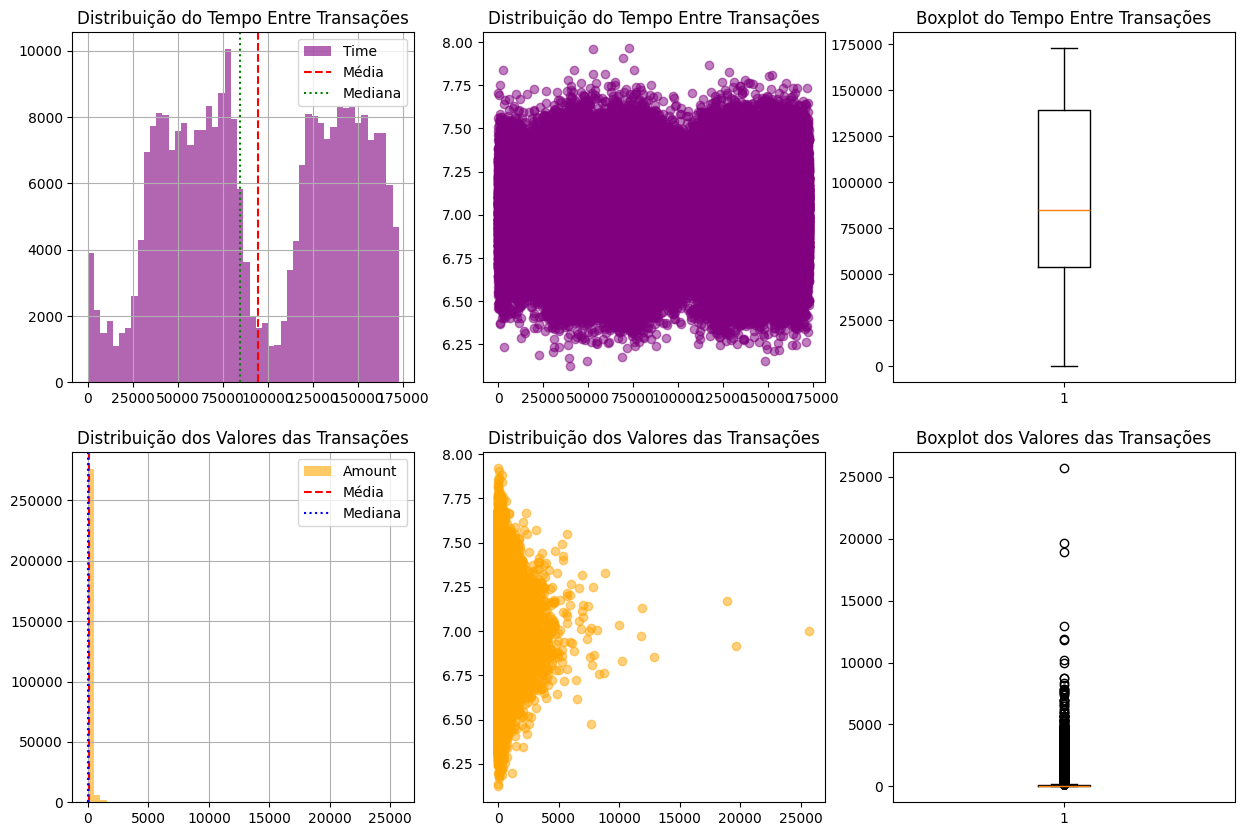

In [53]:
transition_time = creditcard['Time']
transition_amount = creditcard['Amount']

plt.figure(figsize=(15,10))

plt.subplot(2, 3, 1)
transition_time.hist(bins=50, label='Time', alpha=0.6, color = 'purple')
plt.axvline(np.mean(transition_time), ls='--', c='r', label="Média")
plt.axvline(np.median(transition_time), ls=':', c='g', label="Mediana")
plt.ylabel("")
plt.title("Distribuição do Tempo Entre Transações")
plt.legend()

plt.subplot(2, 3, 2)
plt.scatter(transition_time, np.random.normal(7, 0.2, size=transition_time.shape[0]), alpha=0.5, color = 'purple')
plt.ylabel("")
plt.title("Distribuição do Tempo Entre Transações")

plt.subplot(2, 3, 3)
plt.boxplot(transition_time)
plt.ylabel("")
plt.title("Boxplot do Tempo Entre Transações")

plt.subplot(2, 3, 4)
transition_amount.hist(bins=50, label='Amount', alpha=0.6, color = 'orange')
plt.axvline(np.mean(transition_amount), ls='--', c='r', label="Média")
plt.axvline(np.median(transition_amount), ls=':', c='b', label="Mediana")
plt.ylabel("")
plt.title("Distribuição dos Valores das Transações")
plt.legend()

plt.subplot(2, 3, 5)
plt.scatter(transition_amount, np.random.normal(7, 0.2, size=transition_amount.shape[0]), alpha=0.5, color = 'orange')
plt.ylabel("")
plt.title("Distribuição dos Valores das Transações")

plt.subplot(2, 3, 6)
plt.boxplot(transition_amount)
plt.ylabel("")
plt.title("Boxplot dos Valores das Transações")

plt.show()

##### Distribuição dos Valores Transacionados - Fraude e Não Fraude

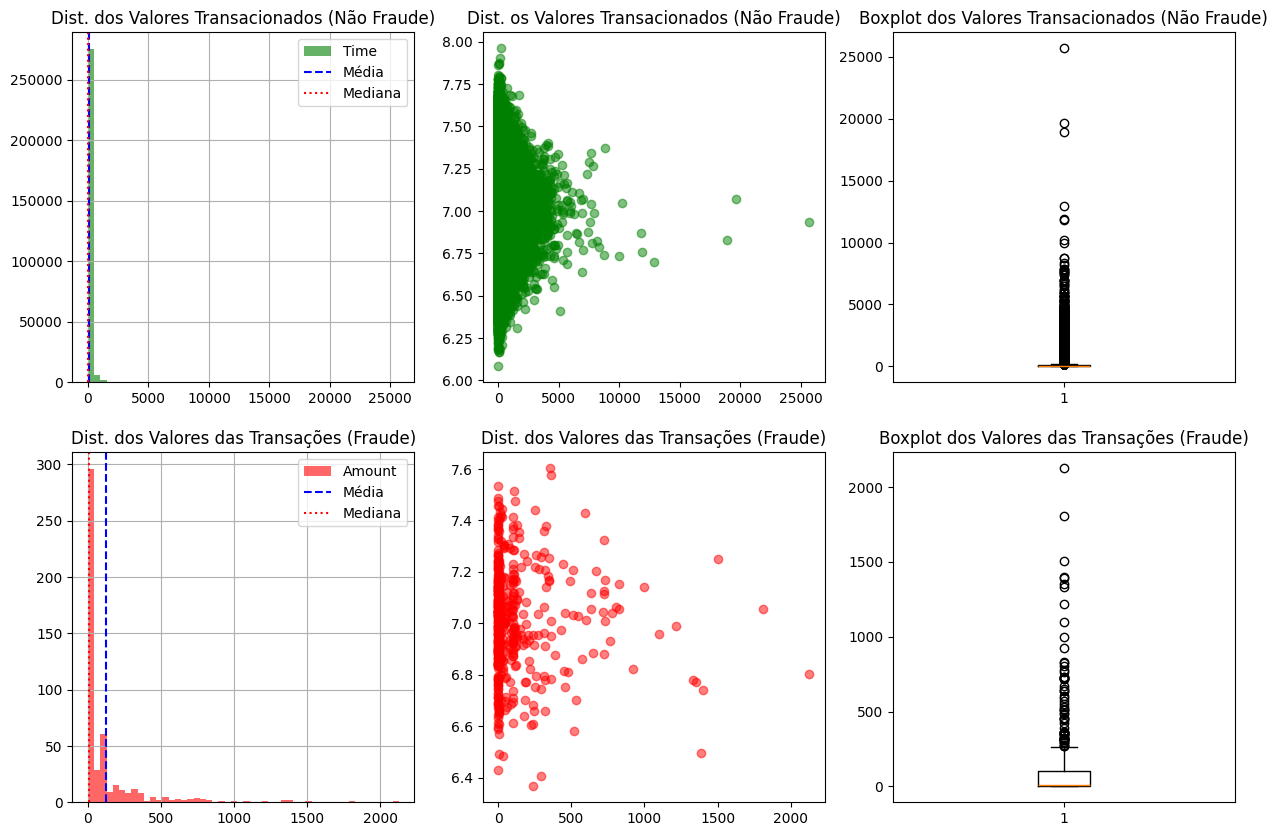

In [54]:
n_fraude_amount = creditcard.loc[creditcard['Class'] == 0, ['Amount']].squeeze()
fraude_amount = creditcard.loc[creditcard['Class'] == 1, ['Amount']].squeeze() # separando grupos e transformando em Series

plt.figure(figsize=(15,10))

plt.subplot(2, 3, 1)
n_fraude_amount.hist(bins=50, label='Time', alpha=0.6, color = 'green')
plt.axvline(np.mean(n_fraude_amount), ls='--', c='b', label="Média")
plt.axvline(np.median(n_fraude_amount), ls=':', c='r', label="Mediana")
plt.ylabel("")
plt.title("Dist. dos Valores Transacionados (Não Fraude)")
plt.legend()

plt.subplot(2, 3, 2)
plt.scatter(n_fraude_amount, np.random.normal(7, 0.2, size=n_fraude_amount.shape[0]), alpha=0.5, color = 'green')
plt.ylabel("")
plt.title("Dist. os Valores Transacionados (Não Fraude)")

plt.subplot(2, 3, 3)
plt.boxplot(n_fraude_amount)
plt.ylabel("")
plt.title("Boxplot dos Valores Transacionados (Não Fraude)")

plt.subplot(2, 3, 4)
fraude_amount.hist(bins=50, label='Amount', alpha=0.6, color = 'red')
plt.axvline(np.mean(fraude_amount), ls='--', c='b', label="Média")
plt.axvline(np.median(fraude_amount), ls=':', c='r', label="Mediana")
plt.ylabel("")
plt.title("Dist. dos Valores das Transações (Fraude)")
plt.legend()

plt.subplot(2, 3, 5)
plt.scatter(fraude_amount, np.random.normal(7, 0.2, size=fraude_amount.shape[0]), alpha=0.5, color = 'red')
plt.ylabel("")
plt.title("Dist. dos Valores das Transações (Fraude)")

plt.subplot(2, 3, 6)
plt.boxplot(fraude_amount)
plt.ylabel("")
plt.title("Boxplot dos Valores das Transações (Fraude)")

plt.show()

As trasações de alto valor não é um quesito de fraude, ou seja, tiveram trasações com valores muito discrepantes da média que não foram considerado fraude de acordo com a amostra.

#### 6.3 Análise de Correlação

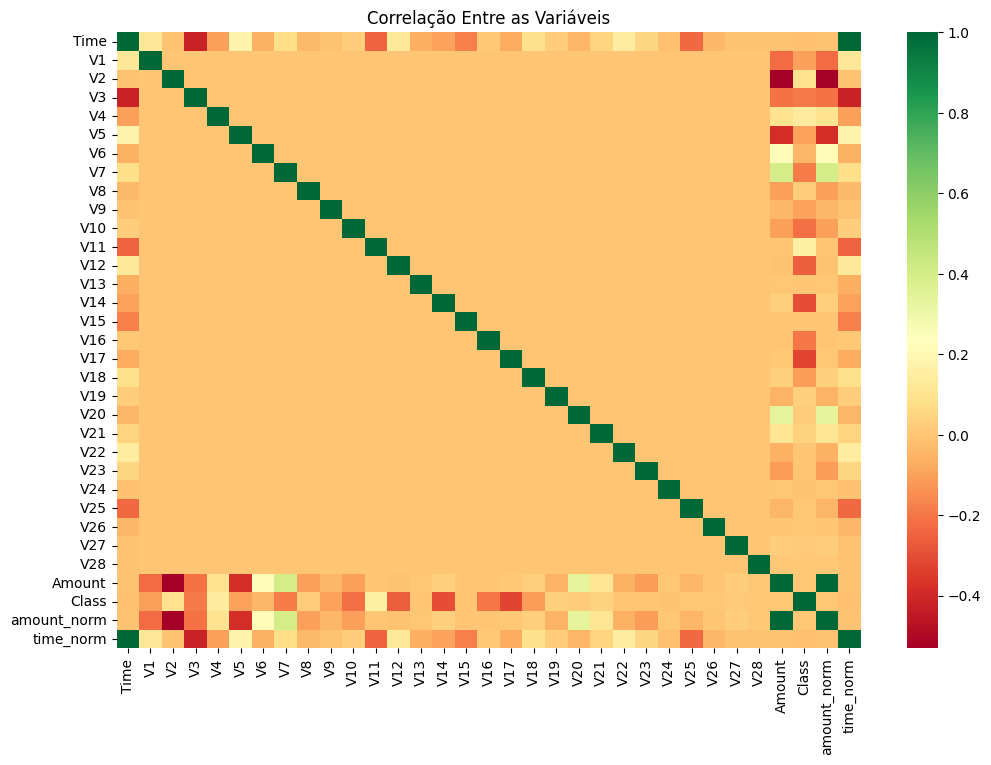

In [64]:
var = ['Class', 'Time', 'Amount']
corr_var = creditcard[var]

plt.figure(figsize=(12, 8))
sns.heatmap(creditcard.corr(), cmap='RdYlGn')
plt.title("Correlação Entre as Variáveis")
plt.show()

Não há correlação entre Tempo, Valor Transacionado e a variável de classificação.

## Normalização

Normalização das variáveis de Tempo (Time) e Valor da Transação (Amount).

In [56]:
rob_scaler = RobustScaler()

creditcard['amount_norm'] = rob_scaler.fit_transform(creditcard['Amount'].values.reshape(-1,1))
creditcard['time_norm'] = rob_scaler.fit_transform(creditcard['Time'].values.reshape(-1,1))

creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,amount_norm,time_norm
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1.783274,-0.994983
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.269825,-0.994983
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,4.983721,-0.994972
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.418291,-0.994972
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.670579,-0.994960


## Balanceamento

Quando há um desbalanceamento de classe significado é necessário realizar técnicas de balancemento da amostra para que o modelo tenha melhor desempenho. Nesse caso, por exemplo, se manter a classe majoritária, o resultado do modelo tenderá para a classe com mais frequência, causando falsos negativos.

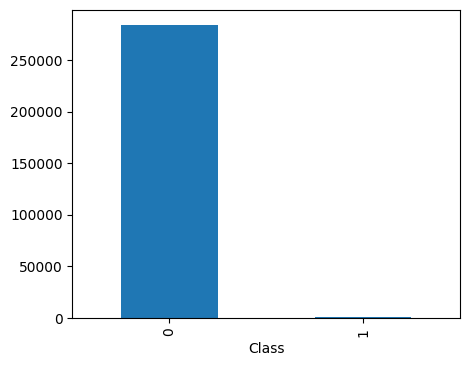

In [57]:
plt.figure(figsize=(5, 4))
creditcard['Class'].value_counts().plot.bar()
plt.show()

In [58]:
X = creditcard.drop(['Class'], axis = 1)
y = creditcard['Class']

In [59]:
from imblearn.under_sampling import ClusterCentroids

Definir melhor o método de balanceamento. Avaliar o desempenho do modelo com undersampling, oversampling e desbalanceado.